# Description

This notebook shows the algorithm running process to solves the [NQueens](https://leetcode.com/problems/n-queens/) problem.

You can try to change the size of the checkerboard(**N**) and see the algorithm's backtracking process.

## How to run?

All the animations in this notebook are rendered by the [algviz](https://algviz.com/) algorithm animation engine in real time. You can follow this [guidance](https://algviz.com/en/installation.html) to set up your local environment or run this repo on Gitpod directly.

*If you meet any problem, please report an 👉[issue](https://github.com/zjl9959/algviz/issues)👈 here.*

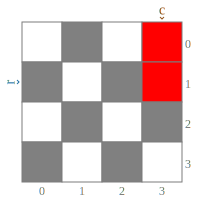

In [1]:
import algviz
N = 4           # The size of the checkerboard
viz = algviz.Visualizer(1)
board = viz.createTable(N, N)
cursor_row = viz.createCursor(name='r')
cursor_col = viz.createCursor(name='c')
board[cursor_row][cursor_col]

def draw_board_background():
    for r in range(N):
        for c in range(N):
            if (r + c) % 2:
                board.mark(algviz.color_gray, r, c, True)

def solve_queen(queen_row_pos, col_has_queen, cur_row):
    if cur_row == N:
        for r in range(N):
            board.mark(algviz.color_green, r, queen_row_pos[r])
        viz.display(3)
        return
    cursor_row << cur_row
    for c in range(0, N):
        cursor_col << c
        board[cur_row][c] = '❔'
        viz.display()
        if col_has_queen[c] == False:
            conflict = False
            for r in range(0, cur_row):
                if queen_row_pos[r] - c == r - cur_row or c - queen_row_pos[r] == r - cur_row:
                    board.mark(algviz.color_red, r, queen_row_pos[r])
                    board.mark(algviz.color_red, cur_row, c)
                    viz.display(0.5)
                    conflict = True
                    break
            if not conflict:
                queen_row_pos[cur_row] = c
                col_has_queen[c] = True
                board[cur_row][c] = '👑'
                viz.display()
                solve_queen(queen_row_pos, col_has_queen, cur_row+1)
                col_has_queen[c] = False
                board[cur_row][c] = ''
                cursor_row << cur_row
            else:
                board[cur_row][c] = ''
        else:
            for r in range(cur_row):
                if queen_row_pos[r] == c:
                    board.mark(algviz.color_red, r, c)
                    break
            board.mark(algviz.color_red, cur_row, c)
            viz.display(0.5)
            board[cur_row][c] = ''

draw_board_background()
solve_queen([-1 for _ in range(N)], [False for _ in range(N)], 0)